In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

train = pd.read_csv('/content/gdrive/MyDrive/데이콘/open/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/데이콘/open/test.csv')
sub = pd.read_csv('/content/gdrive/MyDrive/데이콘/open/sample_submission.csv')
snp_info = pd.read_csv('/content/gdrive/MyDrive/데이콘/open/snp_info.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train.shape

(262, 21)

In [ ]:
snp_list3 = ["SNP_01","SNP_02","SNP_03","SNP_04","SNP_05","SNP_06","SNP_07","SNP_08","SNP_09","SNP_10","SNP_11","SNP_12","SNP_13","SNP_14","SNP_15"]
snp_list2 = ["SNP_03","SNP_06","SNP_12"]
snp_list = ["SNP_01","SNP_02","SNP_04","SNP_05","SNP_07","SNP_08","SNP_09","SNP_10","SNP_11","SNP_13","SNP_14","SNP_15" ]

In [ ]:
train = train.drop(columns = ["father","mother","gender","SNP_03","SNP_06","SNP_12"], axis =1)
test = test.drop(columns = ["father","mother","gender","SNP_03","SNP_06","SNP_12"], axis =1)




In [ ]:
from sklearn.preprocessing import LabelEncoder


#for snp in snp_list:
#    encoder = LabelEncoder()
#    train[snp] = train[snp].map({'A A':0, 'G A':1, 'G G':2, 'C A':1, 'C C':2, 'A G':1, 'C A':1})
#    test[snp] = test[snp].map({'A A':0, 'G A':1, 'G G':2, 'C A':1, 'C C':2})

for snp in snp_list:
  train = pd.concat([train,pd.get_dummies(train[snp], [snp])], axis = 1)
  train = train.drop(columns = [snp], axis =1)
  test = pd.concat([test,pd.get_dummies(test[snp], [snp])], axis = 1)
  test = test.drop(columns = [snp], axis =1)

#for snp in snp_list:
#  encoder = LabelEncoder()
#  train[snp] = encoder.fit_transform(train[snp])
#  test[snp] = encoder.fit_transform(test[snp])

In [ ]:
train.head()

,id,trait,class,['SNP_01']_A A,['SNP_01']_A G,['SNP_01']_G G,['SNP_02']_A A,['SNP_02']_A G,['SNP_02']_G G,['SNP_04']_A A,...,['SNP_11']_G G,['SNP_13']_A A,['SNP_13']_A G,['SNP_13']_G G,['SNP_14']_A A,['SNP_14']_C A,['SNP_14']_C C,['SNP_15']_A A,['SNP_15']_G A,['SNP_15']_G G
0,TRAIN_000,2,B,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,TRAIN_001,2,C,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2,TRAIN_002,2,B,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,TRAIN_003,1,A,1,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
4,TRAIN_004,2,C,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
train.isna().sum().sum()

0

In [ ]:
train["class"] = train["class"].map({'B':1, 'C':2})
bc_corr = train[train["trait"]==2]

In [ ]:
bc_corr.shape

(193, 39)

In [ ]:
bc_corr.isna().sum().sum()

0

In [ ]:
bc_corr.corr()

,trait,class,['SNP_01']_A A,['SNP_01']_A G,['SNP_01']_G G,['SNP_02']_A A,['SNP_02']_A G,['SNP_02']_G G,['SNP_04']_A A,['SNP_04']_G A,...,['SNP_11']_G G,['SNP_13']_A A,['SNP_13']_A G,['SNP_13']_G G,['SNP_14']_A A,['SNP_14']_C A,['SNP_14']_C C,['SNP_15']_A A,['SNP_15']_G A,['SNP_15']_G G
trait,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,NaN,1.000000,0.195905,0.109041,-0.174776,0.338818,-0.089687,-0.259662,0.469104,-0.369596,...,-0.244596,-0.291779,0.028313,0.264941,-0.396955,0.373342,0.122924,-0.214621,0.142794,0.158967
['SNP_01']_A A,NaN,0.195905,1.000000,-0.096432,-0.258324,0.108912,-0.023360,-0.089925,0.130016,-0.112193,...,-0.065771,0.047995,-0.025039,-0.020191,-0.055592,0.064399,-0.016688,0.021681,-0.003093,-0.040093
['SNP_01']_A G,NaN,0.109041,-0.096432,1.000000,-0.936645,0.031968,0.010066,-0.046372,0.058959,-0.077554,...,-0.033917,0.040743,-0.067109,0.035479,-0.201568,0.233502,-0.060508,0.007493,0.060938,-0.145371
['SNP_01']_G G,NaN,-0.174776,-0.258324,-0.936645,1.000000,-0.069356,-0.001549,0.076655,-0.102979,0.114755,...,0.056065,-0.056435,0.073946,-0.027329,0.215202,-0.249296,0.064601,-0.014902,-0.058057,0.155204
['SNP_02']_A A,NaN,0.338818,0.108912,0.031968,-0.069356,1.000000,-0.611489,-0.356980,0.073405,-0.031885,...,0.000848,-0.239552,0.109813,0.118175,-0.129187,0.079319,0.158063,-0.032322,0.038537,-0.012184
['SNP_02']_A G,NaN,-0.089687,-0.023360,0.010066,-0.001549,-0.611489,1.000000,-0.520830,0.050312,-0.071867,...,-0.021861,0.104854,-0.090987,-0.002471,-0.001444,0.036054,-0.096654,0.071475,-0.068577,-0.008351
['SNP_02']_G G,NaN,-0.259662,-0.089925,-0.046372,0.076655,-0.356980,-0.520830,1.000000,-0.138590,0.119242,...,0.024892,0.134661,-0.011059,-0.124578,0.141081,-0.128138,-0.056425,-0.049508,0.039382,0.023004
['SNP_04']_A A,NaN,0.469104,0.130016,0.058959,-0.102979,0.073405,0.050312,-0.138590,1.000000,-0.862920,...,-0.015560,-0.114831,0.015990,0.098706,-0.085042,0.097750,-0.023386,-0.127297,0.079976,0.104294
['SNP_04']_G A,NaN,-0.369596,-0.112193,-0.077554,0.114755,-0.031885,-0.071867,0.119242,-0.862920,1.000000,...,0.042430,0.082417,0.009899,-0.095373,0.041105,-0.057205,0.039173,0.087011,-0.053668,-0.073405


In [ ]:
train.corr()

,trait,class,['SNP_02']_A A,['SNP_02']_A G,['SNP_02']_G G,['SNP_04']_A A,['SNP_04']_G A,['SNP_04']_G G,['SNP_05']_A A,['SNP_05']_C A,...,['SNP_07']_G G,['SNP_08']_A A,['SNP_08']_G A,['SNP_08']_G G,['SNP_10']_A A,['SNP_10']_A G,['SNP_10']_G G,['SNP_14']_A A,['SNP_14']_C A,['SNP_14']_C C
trait,1.000000,NaN,0.315287,0.350771,-0.608366,0.514873,-0.117852,-0.513258,-0.546415,0.159607,...,-0.822239,-0.645618,0.256869,0.392856,-0.483726,-0.318084,0.644775,0.717554,-0.487974,-0.457579
class,NaN,1.000000,0.338818,-0.089687,-0.259662,0.469104,-0.369596,-0.223716,0.420825,0.164037,...,NaN,0.269227,0.195434,-0.392960,0.295325,0.444854,-0.562709,-0.396955,0.373342,0.122924
['SNP_02']_A A,0.315287,0.338818,1.000000,-0.404301,-0.441583,0.220825,-0.062501,-0.205462,-0.085835,0.222422,...,-0.259241,-0.195006,0.098198,0.097020,-0.058819,-0.080060,0.115115,0.157422,-0.108587,-0.098197
['SNP_02']_A G,0.350771,-0.089687,-0.404301,1.000000,-0.642089,0.215327,-0.106240,-0.144763,-0.210968,0.019532,...,-0.337026,-0.188147,0.073135,0.116295,-0.211701,-0.057259,0.209480,0.269084,-0.156178,-0.209921
['SNP_02']_G G,-0.608366,-0.259662,-0.441583,-0.642089,1.000000,-0.396323,0.156605,0.314225,0.278899,-0.205592,...,0.547905,0.348018,-0.154051,-0.195403,0.256973,0.123274,-0.301982,-0.395912,0.244222,0.288233
['SNP_04']_A A,0.514873,0.469104,0.220825,0.215327,-0.396323,1.000000,-0.681937,-0.440915,-0.192512,0.091533,...,-0.432602,-0.274043,0.191277,0.080405,-0.200513,-0.002535,0.152545,0.324006,-0.203260,-0.231033
['SNP_04']_G A,-0.117852,-0.369596,-0.062501,-0.106240,0.156605,-0.681937,1.000000,-0.355800,-0.055984,0.025026,...,0.018070,0.018941,-0.067483,0.051414,-0.005672,-0.093477,0.087181,-0.011696,0.016408,-0.004626
['SNP_04']_G G,-0.513258,-0.223716,-0.205462,-0.144763,0.314225,-0.440915,-0.355800,1.000000,0.314684,-0.147667,...,0.530584,0.326916,-0.161592,-0.165830,0.263166,0.117949,-0.301899,-0.399648,0.239582,0.300880
['SNP_05']_A A,-0.546415,0.420825,-0.085835,-0.210968,0.278899,-0.192512,-0.055984,0.314684,1.000000,-0.522880,...,0.657256,0.266737,-0.056859,-0.214034,0.248630,0.265076,-0.421530,-0.443242,0.366415,0.189758
['SNP_05']_C A,0.159607,0.164037,0.222422,0.019532,-0.205592,0.091533,0.025026,-0.147667,-0.522880,1.000000,...,-0.343666,-0.044136,0.025111,0.018928,-0.002513,-0.024486,0.023607,0.111961,-0.115042,-0.015787


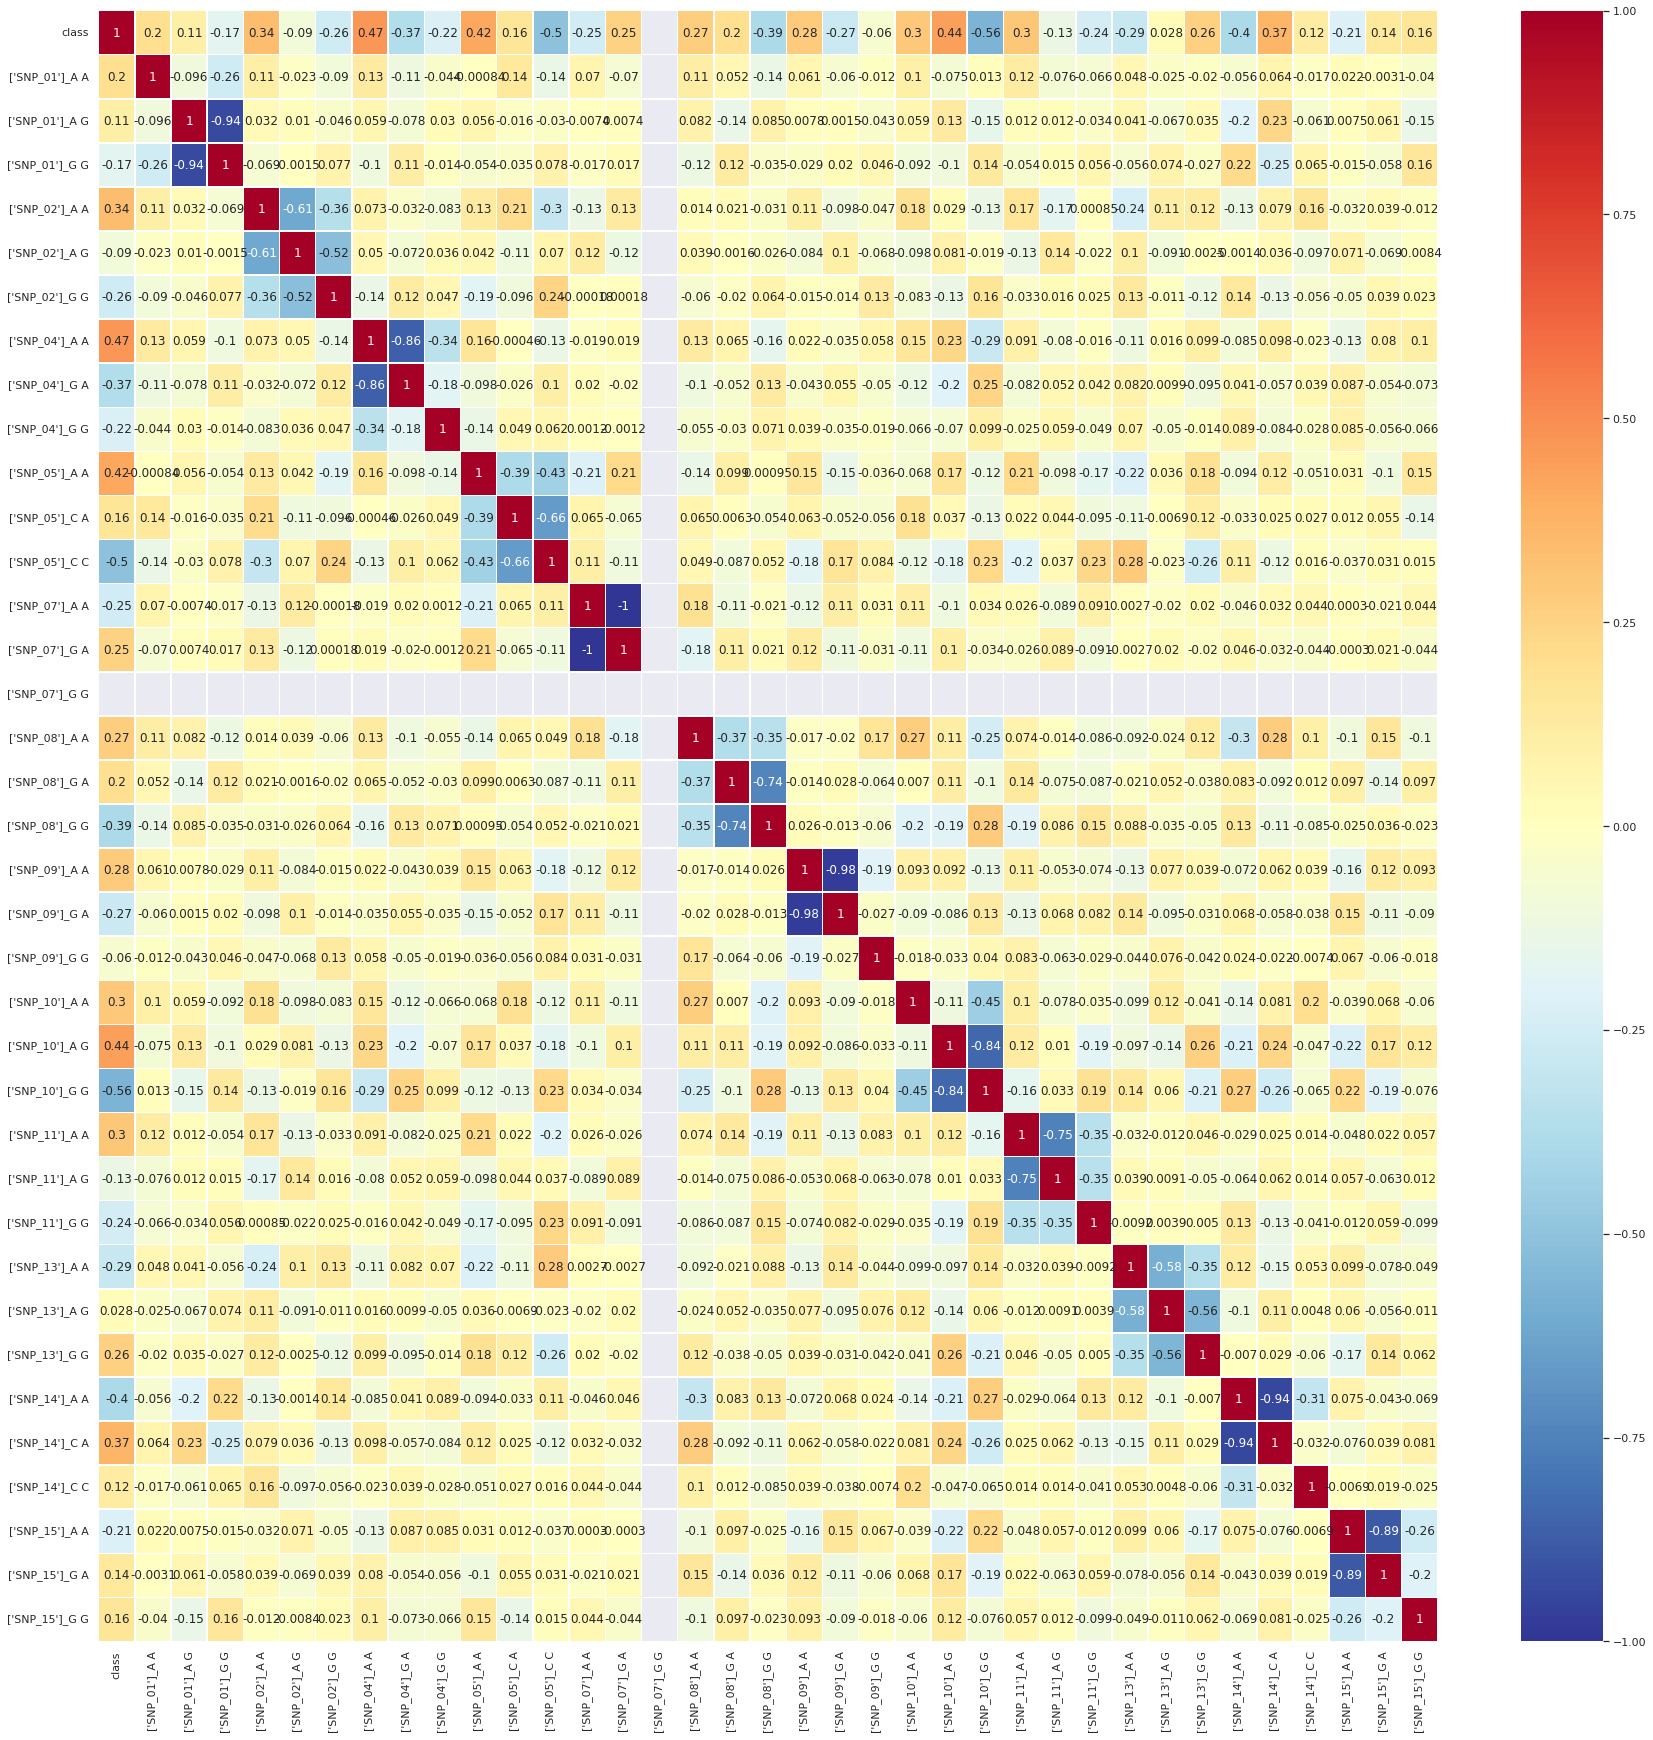

In [ ]:
import seaborn as sns
a = bc_corr.drop(columns=[ "id", "trait"], axis = 1)
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(a.corr(), 
            annot=True, cmap = 'RdYlBu_r',
            linewidths=.5)

In [ ]:
X_train = bc_corr.drop(columns=["class", "id", "trait"], axis = 1)
y_train = bc_corr["class" ]

X_test = test.drop(columns = ["id","trait"])

In [ ]:
X_train.shape

(193, 36)

In [ ]:
import tensorflow.keras as keras
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold


final_model = keras.models.Sequential([
    keras.layers.Dense(36,activation = 'relu', input_dim = 36),
    keras.layers.Dense(18,activation = 'relu'),
    keras.layers.Dense(9,activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
from keras.utils import np_utils
Y_encoded = np_utils.to_categorical(y_train)
final_model.fit(X_train,Y_encoded,epochs=15, batch_size=1)

Epoch 1/20
193/193 [==============================] - 1s 2ms/step - loss: 0.6842 - acc: 0.7461
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 0.2457 - acc: 0.9223
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 0.1586 - acc: 0.9430
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 0.1086 - acc: 0.9637
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 0.0934 - acc: 0.9741
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 0.0871 - acc: 0.9741
Epoch 7/20
193/193 [==============================] - 0s 2ms/step - loss: 0.0664 - acc: 0.9793
Epoch 8/20
193/193 [==============================] - 0s 2ms/step - loss: 0.0429 - acc: 0.9896
Epoch 9/20
193/193 [==============================] - 0s 2ms/step - loss: 0.0602 - acc: 0.9741
Epoch 10/20
193/193 [==============================] - 0s 2ms/step - loss: 0.0349 - acc: 0.9896
Epoch 11/20
193/193 [============================

In [ ]:
y_pred = final_model.predict(X_test)

y_pred = y_pred.argmax(axis=1)

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1])

In [ ]:
y_pred = np.where(y_pred == 0, "A", y_pred)
y_pred = np.where(y_pred == "1", "B", y_pred)
y_pred = np.where(y_pred == "2", "C", y_pred)

In [ ]:
y_pred

array(['C', 'B', 'C', 'B', 'C', 'B', 'C', 'B', 'C', 'C', 'C', 'B', 'B',
       'C', 'B', 'B', 'C', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'B', 'B',
       'B', 'C', 'C', 'B', 'C', 'C', 'B', 'C', 'C', 'B', 'C', 'B', 'B',
       'C', 'C', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'C', 'B',
       'C', 'B', 'B', 'B', 'C', 'C', 'B', 'C', 'C', 'B', 'C', 'C', 'C',
       'C', 'B', 'C', 'C', 'B', 'B', 'B', 'C', 'C', 'C', 'B', 'C', 'B',
       'B', 'B', 'C', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'B',
       'B', 'C', 'B', 'B', 'C', 'C', 'B', 'C', 'C', 'C', 'B', 'B', 'C',
       'C', 'C', 'C', 'B', 'C', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'C',
       'C', 'B', 'C', 'C', 'B', 'B', 'C', 'C', 'B', 'C', 'B', 'C', 'B',
       'C', 'C', 'B', 'B', 'B', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C',
       'B', 'B', 'B', 'C', 'B', 'C', 'C', 'C', 'B', 'C', 'B', 'B', 'C',
       'C', 'B', 'C', 'C', 'B', 'C', 'C', 'B', 'C', 'C', 'C', 'B', 'B',
       'C', 'B', 'C', 'C', 'B', 'B'], dtype='<U21')

In [ ]:
test["class"] = y_pred
test.loc[test["trait"]== 1 ,"class"] = "A"

In [ ]:
y_pred = test["class"]

In [ ]:
y_pred

0      A
1      B
2      C
3      B
4      A
      ..
170    B
171    C
172    C
173    B
174    B
Name: class, Length: 175, dtype: object

In [ ]:
sub["class"] = y_pred # 이전 셀에서 최종 모델로 생성한 답안

sub.to_csv(f"2020122025.csv", index=False) # 생성된 csv 파일을 좌측 폴더에서 다운로드하여 제출